In [23]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

---

Решить задачу Коши на заданном интервале:

1. С помощью встроенной функции NDSolve
2. Методом Эйлера с шагом h. Вычислить и вывести на печать оценку погрешности на шаге по правилу Рунге.
3. Методом Рунге-Кутты 3-того порядка с постоянным шагом h. Вычислить и вывести на печать оценку погрешности на шаге по правилу Рунге.
4. Методом прогноза-коррекции с использованием явных и неявных формул Адамса. Порядок метода Адамса должен совпадать с порядком метода Рунге-Кутты в п. 3
5. Для сравнения в п. 2–5 в тех же точках напечатать или сравнить на графике решения, полученные в п. 1.

h = 0.05, x $ \in $ [0, 0.3],
$$\begin{cases}
    y^{'} (x) = y(x) + (1 + x) y(x),
    \\
    y(0) = 1.
\end{cases}$$

---

### Постановка задачи
<u>Цель</u>: Решить задачу Коши на заданном интервале встроенным методом, Эйлера с шагом h, Рунге-Кутты 3-го порядка, прогноза-коррекции.

<u>Исходные данные</u>: Заданный интервал [0, 0.3], шаг h, система ОДУ.

<u>Модельные представления</u>: Задача Коши. Метод Эйлера с шагом h. Метод Рунге-Кутты 3-го порядка. Метод прогноза-коррекции с использованием явных и неявных формул Адамса 3-го порядка.
Квадратурная формула Гаусса с шестью узлами. Метод Симпсона. Алгоритм автоматического выбора шага интегрирования. Интерполяция по Ричардсону.

<u>Критерий оценки результата</u>: результатывычислений соответствуют известным экспериментальным значениям.

---

1. С помощью встроенной функции NDSolve

In [10]:
# Определение уравнения
def f(x, y):
    return y + (1 + x) * y

# Задание начальных условий
x0, y0 = 0, 1

# Заданный шаг
h = 0.05

# Определение интервала
t_span = (0, 0.3)

In [4]:
# Решение с помощью встроенной функции NDSolve
sol = solve_ivp(f, t_span, y0, method='RK45', dense_output=True)

In [5]:
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.246e-02  3.000e-01]
        y: [[ 1.000e+00  1.159e+00  1.906e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001EE430E3AC0>
 t_events: None
 y_events: None
     nfev: 14
     njev: 0
      nlu: 0


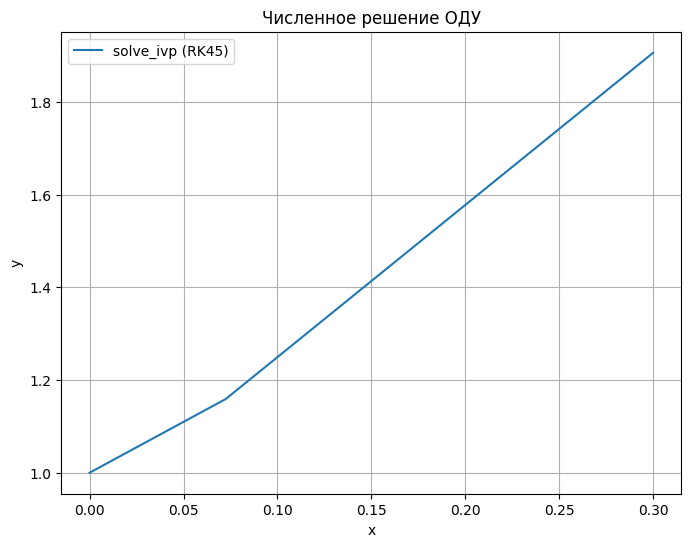

In [7]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='solve_ivp (RK45)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение ОДУ')
plt.legend()
plt.grid(True)
plt.show()

---

#### Метод Эйлера

$$ y(x_0 + h) = y(x_0) + \int_{x_0}^{x_0+h} f(t, y(t)) dt \approx y(x_0) + h f (x_0, y(x_0)) $$

$$ y (x_0 + h) \approx y(x_0) + h f (x_0, y_0) $$

$$\begin{cases}
y_{i+1} = y_i + h f (x_i, y_i), \ i = 0, \dots, n
\\
y_0 = y(x_0)
\end{cases}$$

#### Правило Рунге на основе метода Эйлера

$$ R = \left|  \frac{y^h - y^{h/2}}{2^2 - 1}  \right| $$

In [18]:
# Реализация метода Эйлера с итерациями и проверкой по правилу Рунге
def euler_method_with_runge(f, x0, y0, h, tolerance=1e-5, max_iterations=100):
    x_values = [x0]
    y_values = [y0]
    iterations = 0

    while x_values[-1] < 0.3 and iterations < max_iterations:
        x_i = x_values[-1]
        y_i = y_values[-1]

        # Первая итерация
        y_i1 = y_i + h * f(x_i, y_i)
        x_values.append(x_i + h)
        y_values.append(y_i1)

        # Вторая итерация с уменьшенным шагом
        y_i1_half = y_i + (h / 2) * f(x_i, y_i)
        y_i1_half = y_i1_half + (h / 2) * f(x_i + h / 2, y_i1_half)

        # Оценка погрешности по правилу Рунге
        error_estimate = np.abs(y_i1_half - y_i1) / (2**2 - 1)

        # Проверка на достижение заданной погрешности
        if error_estimate < tolerance:
            break

        # Пересчет шага
        h = h * np.sqrt(tolerance / error_estimate)

        iterations += 1

    return np.array(x_values), np.array(y_values)


Метод Эйлера с итерациями и правилом Рунге:
Решение: 1.9008148031908494
Количество итераций: 67


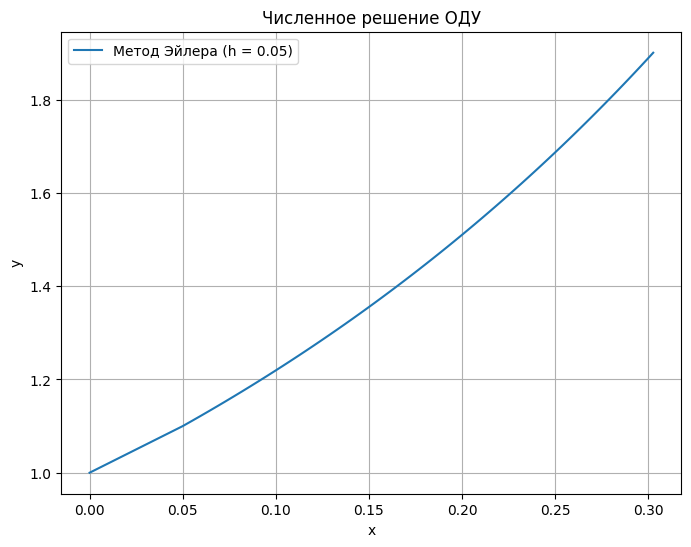

In [19]:
# Решение методом Эйлера с итерациями и проверкой по правилу Рунге
x_euler_runge, y_euler_runge = euler_method_with_runge(f, x0, y0, h)

# Вывод результатов
print("Метод Эйлера с итерациями и правилом Рунге:")
print(f"Решение: {y_euler_runge[-1]}")
print(f"Количество итераций: {len(x_euler_runge) - 1}")

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x_euler_runge, y_euler_runge, label=f'Метод Эйлера (h = {h})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение ОДУ')
plt.legend()
plt.grid(True)
plt.show()

---

#### Метод Рунге-Кутты 3-го порядка

$$ y_{i+1} = y_i + \frac{1}{6} (k_1 + 4 k_2 + k_3) $$

$$ k_1 = h f (x_1, \ y_1) $$

$$ k_2 = h f (x_i + \frac{h}{2}, \ y_i + \frac{k_1}{2}) $$

$$ k_3 = h f (x_i + h, \ y_i - k_1 + 2 k_2) $$

In [20]:
def runge_kutta_third_order(f, x0, y0, h, tolerance=1e-5, max_iterations=100):
    x_values = [x0]
    y_values = [y0]
    iterations = 0

    while x_values[-1] < 0.3 and iterations < max_iterations:
        x_i = x_values[-1]
        y_i = y_values[-1]

        k1 = h * f(x_i, y_i)
        k2 = h * f(x_i + h / 2, y_i + k1 / 2)
        k3 = h * f(x_i + h, y_i - k1 + 2 * k2)

        y_i1 = y_i + (1 / 6) * (k1 + 4 * k2 + k3)

        x_values.append(x_i + h)
        y_values.append(y_i1)

        # Проверка на достижение заданной погрешности
        if np.abs(y_values[-1] - y_values[-2]) < tolerance:
            break

        iterations += 1

    return np.array(x_values), np.array(y_values)

Метод Рунге-Кутты 3-го порядка:
Решение: 1.9059304955486003
Количество итераций: 6


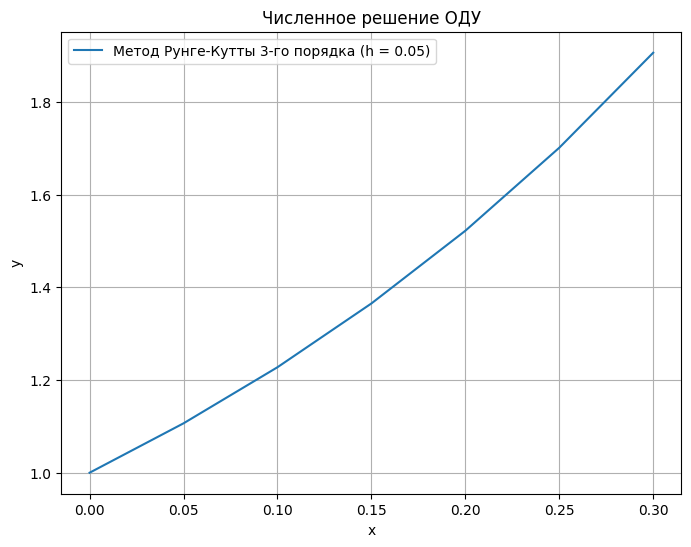

In [22]:
# Решение методом Рунге-Кутты 3-го порядка
x_rk3, y_rk3 = runge_kutta_third_order(f, x0, y0, h)

# Вывод результатов
print("Метод Рунге-Кутты 3-го порядка:")
print(f"Решение: {y_rk3[-1]}")
print(f"Количество итераций: {len(x_rk3) - 1}")

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(x_rk3, y_rk3, label=f'Метод Рунге-Кутты 3-го порядка (h = {h})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение ОДУ')
plt.legend()
plt.grid(True)
plt.show()

---

#### Метод Адамса 3-го порядка

Явный метод Адамса-Башфорта:

$$ y_{i+1} = y_i + \frac{h}{12} (23 f_i - 16 f_{i-1} + 5 f_{i-2}) $$

Неявный метод Адамса-Моултон:

$$ y_{i+1} = y_i + \frac{h}{12} (5 f_{i+1} + 8 f_i - f_{i-1}) $$

---

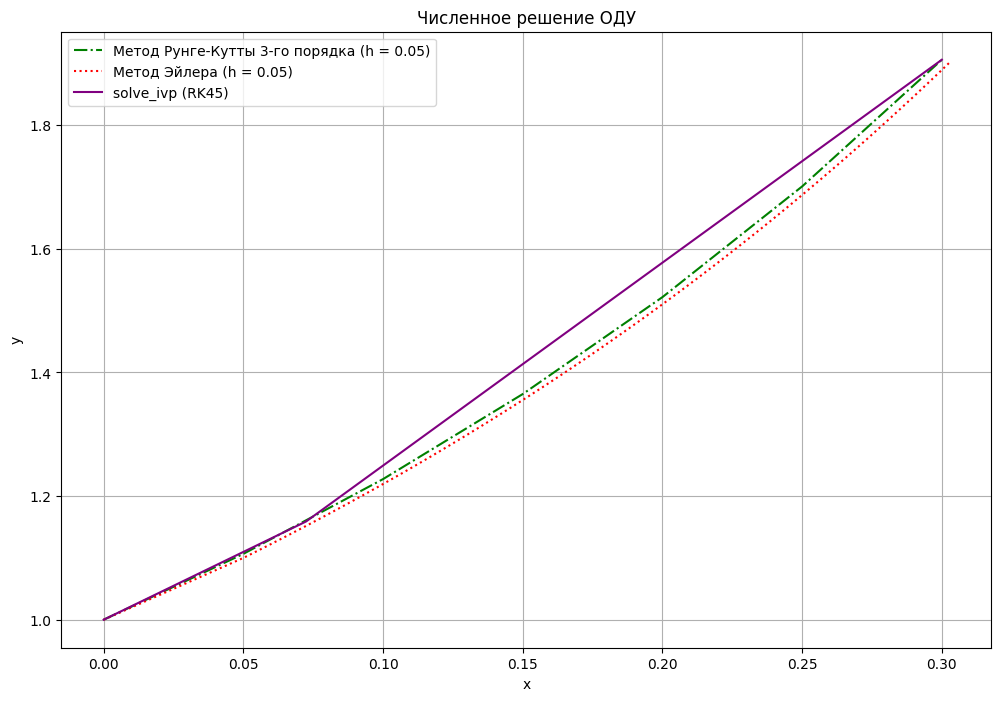

In [38]:
# Построение графика
plt.figure(figsize=(12, 8))

# Метод Рунге-Кутты 3-го порядка
plt.plot(x_rk3, y_rk3, label=f'Метод Рунге-Кутты 3-го порядка (h = {h})', color='green', linestyle='-.')

# Метод Эйлера с итерациями и правилом Рунге
plt.plot(x_euler_runge, y_euler_runge, label=f'Метод Эйлера (h = {h})', color='red', linestyle=':')

# solve_ivp (RK45)
plt.plot(sol.t, sol.y[0], label='solve_ivp (RK45)', color='purple', linestyle='-')

# Параметры графика
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение ОДУ')
plt.legend()
plt.grid(True)
plt.show()


---

## Контрольные вопросы:

1.	Сформулируйте задачу Коши для обыкновенного дифференциального уравнения первого порядка. 

Задача Коши для ОДУ первого порядка:

$$\begin{cases}
    y^{'} (x) = f(x, y(x)),
    \\
    y(x_0) = y_0 \ \ \ \ \ \ x_0 \leq x \leq b
\end{cases}$$

Обозначения:

$$ 
h = \frac{b - x_0}{n} 
\\
x_i = x_0 + i h
\\
i = 1, 2, \dots, n
\\
y_i = y(x_i)
\\
f_i = f(x_i, y_i)
$$

Приближенные методы вычисляют аналитическое значение решения, которое приближает точное решение.

Численные методы вычисляют решение на некоторой сетке узлов  

$$ \Omega : x_0 < x_1 < \dots < x_n; \ \ h_i = x_i - x_{i-1} $$

определяя значения:

$$ y_0, \ y1, \ \dots, \ y_n $$

$$ y_0 = y(x_0), \ y_1 \approx y(x_1), \ \dots, \ y_i \approx y(x_i), \ \dots, \ y_n \approx y(x_n) $$

---

5.	С помощью метода Эйлера получить решение задачи Коши в точке $ x_0 + h $, где $ x_0 $ определяется начальным условием и $ h = 0.1 $. Варианты задания те же, что в п. 12.

$$\begin{cases}
    y^{'} = 3 x^2 - 4 y^2,
    \\
    y(3) = 2.
\end{cases}$$

#### Метод Эйлера

$$ y(x_0 + h) = y(x_0) + \int_{x_0}^{x_0+h} f(t, y(t)) dt \approx y(x_0) + h f (x_0, y(x_0)) $$

$$ y (x_0 + h) \approx y(x_0) + h f (x_0, y_0) $$

$$\begin{cases}
y_{i+1} = y_i + h f (x_i, y_i), \ i = 0, \dots, n
\\
y_0 = y(x_0)
\end{cases}$$


$$ x_0 = 3, y_0 = 2 $$

$$ x_0 + h = 3 + 0.1 = 3.1 $$

$$
y_1 = 2 + 0.1 * 11 = 3.1, x_1 = 3.1
\\
y_2 = 3.1 + 0.1 * -9.61 = 2.139
$$

$$ y(x_0 + h) = 2.139 $$

---

9.	В чем состоит идея метода «прогноз-коррекция». Приведите формулы метода на основе формул Эйлера.

Идея метода "прогноз-коррекция" заключается в том, чтобы сначала сделать прогноз (приближенное значение) следующего шага метода, а затем скорректировать это значение с учетом более точных данных. Этот подход позволяет улучшить точность численного решения дифференциального уравнения.

Алгоритм метода прогноза и коррекции:

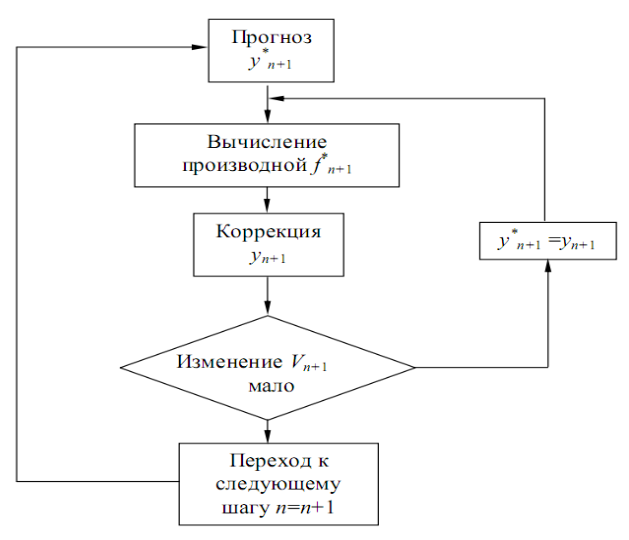

По сравнению с одношаговыми методами, методы прогноза и коррекции имеют ряд особенностей:

1. Для реализации методов прогноза и коррекции необходимо иметь информацию о нескольких предыдущих точках. Поэтому они не относятся к числу «самостартующихся» методов и начинать решение приходится с помощью какого-либо одношагового метода. По этой же причине в процессе решения дифференциальных уравнений нельзя изменять шаг интегрирования.

2. Одношаговые методы и методы прогноза и коррекции обеспечивают приблизительно одинаковую точность результатов, однако вторые в отличие от первых позволяют легко оценить погрешность на шаге.

3. Применяя метод Рунге - Кутта четвёртого порядка, на каждом шаге приходится вычислять четыре значения функции, в то время как для обеспечения сходимости метода прогноза и коррекции того же порядка точности достаточно двух значений функции. Поэтому методы прогноза и коррекции требуют почти вдвое меньше машинного времени, чем методы Рунге - Кутта сравнимой точности.


#### Метод Адамса 3-го порядка

Явный метод Адамса-Башфорта:

$$ y_{i+1} = y_i + \frac{h}{12} (23 f_i - 16 f_{i-1} + 5 f_{i-2}) $$

Неявный метод Адамса-Моултон:

$$ y_{i+1} = y_i + \frac{h}{12} (5 f_{i+1} + 8 f_i - f_{i-1}) $$

Так как для старта методов Адамса необходимо больше, чем одно значение решения, полученное в нескольких точках, предшествующих текущей точке, в которой вычисляется решение, то эти методы — многошаговые

На практике явные и неявные формулы Адамса часто используются совместно в методах типа «прогноз-коррекция». 
